In [1]:
# Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from pca import pca

from sklearn.metrics import accuracy_score, silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading in the data
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Data Exploration

In [3]:
# Renaming the city column to state.

df = df.rename(columns={'City':'State'})

In [4]:
# To get a better understanding of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
# Making all numerical features float types
df['Assault'] = df['Assault'].astype('float64')
df['UrbanPop'] = df['UrbanPop'].astype('float64')
df.dtypes

State        object
Murder      float64
Assault     float64
UrbanPop    float64
Rape        float64
dtype: object

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There are no missing values in the dataset

## Performining Exploratory data analysis

In [7]:
# Performing a statistical summary of the dataset
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


## Performining Exploratory Data Analysis on the Data

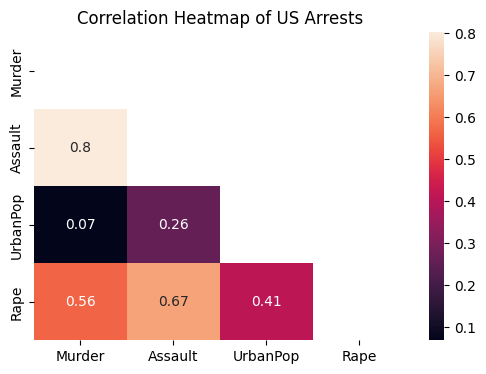

In [8]:
# Understanding how the features correlates with each other using heatmap
plt.figure(figsize=(6,4))
crime_corr = df.corr()

# Masking mirrored section of the heatmap
dropmirror = np.zeros_like(crime_corr)
dropmirror[np.triu_indices_from(dropmirror)] = True

sns.heatmap(crime_corr, annot=True, mask=dropmirror)
plt.title('Correlation Heatmap of US Arrests')
plt.show()

From the heatmap, we could see that the crimes are all correlated with each other. An increase in one crime also suggests increase in another. Because they are highly correlated, they are a good candidate for PCA.

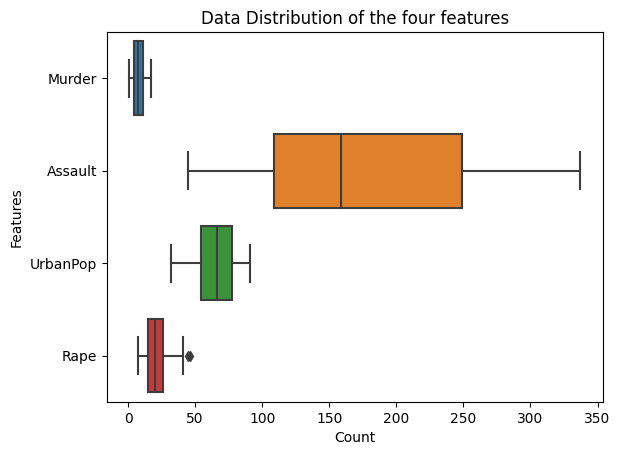

In [9]:
# Checking how each features are distributed using boxplots
sns.boxplot(data=df, orient='h')
plt.ylabel('Features')
plt.xlabel('Count')
plt.title('Data Distribution of the four features')
plt.show()

### Urban population are denotated in percentage while Murder, Assault and Rape are not denoted in percentages but in a ratio of 1:100,000. From here we could also see that Assualt is very high compared to the other features.

For a better distribution, the dataset will be scaled appropriately for the analysis.

### Data Scaling

In [10]:
# Using Standard Scaler to scale the independent features
data = df.iloc[:,1:].values
X_data = StandardScaler().fit_transform(data)

df_scaled = pd.DataFrame(X_data, columns = df.drop(["State"],axis=1).columns)
df_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [11]:
labels=df_scaled.columns
labels

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

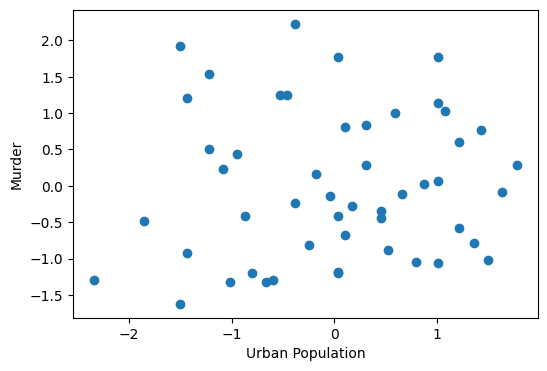

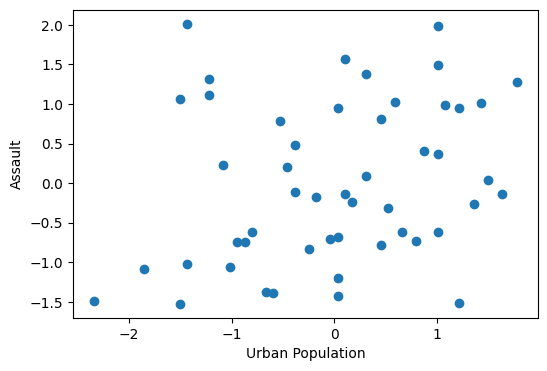

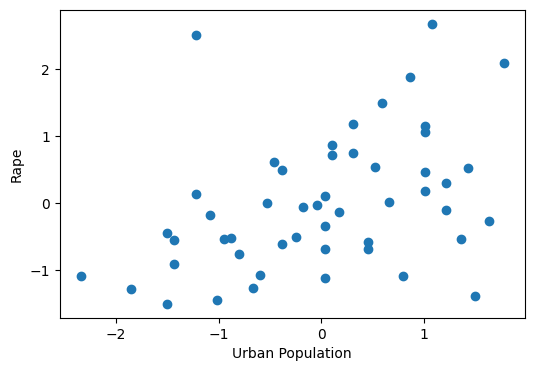

In [12]:
# Running a scatter plot for the all other features against 'UrbanPop' variables
labels=df_scaled.drop(["UrbanPop"],axis=1).columns
for crime in labels:    
    plt.figure(figsize=(6,4))
    plt.scatter('UrbanPop',crime,data=df_scaled)
    plt.xlabel('Urban Population')
    plt.ylabel(crime)

From the scattter plots above, we could see that urban population is positively correlated to Rape, but it is not so for Murder and Assault crimes. Let us now compare the crimes among themselves

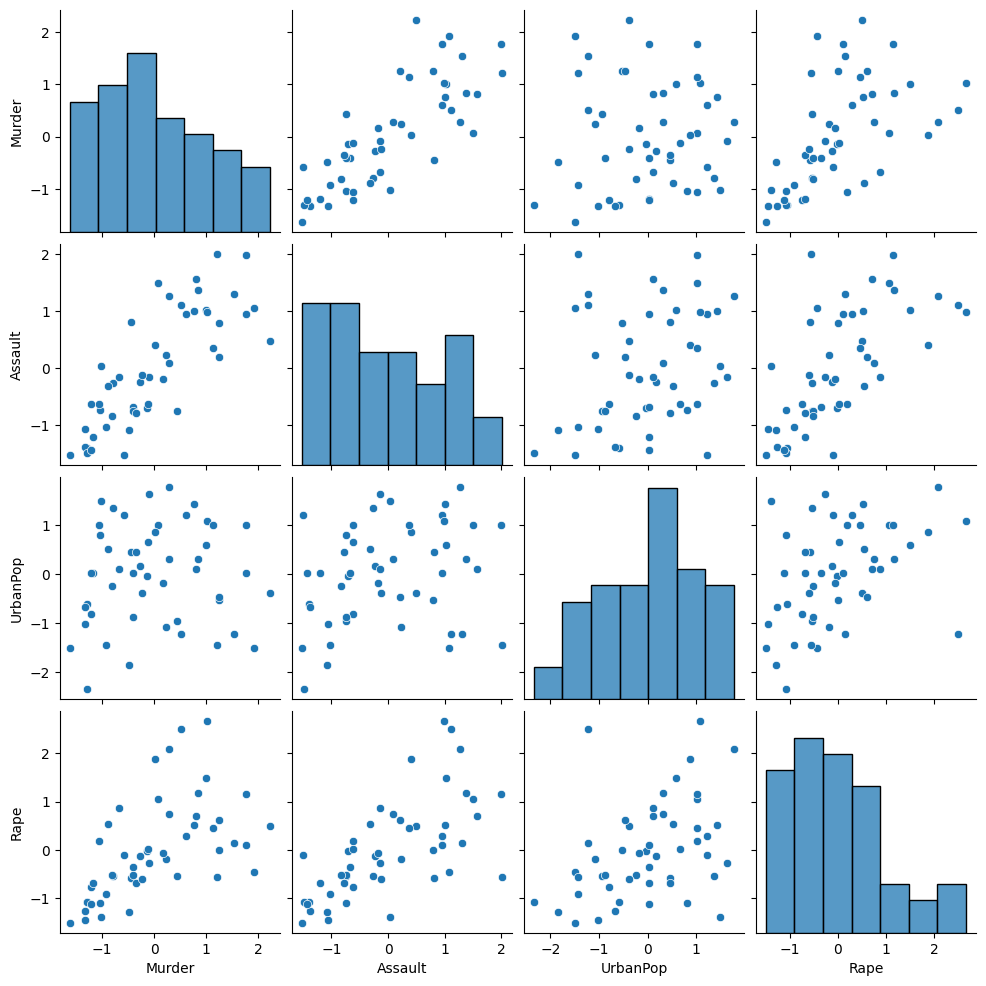

In [13]:
# Using a pairplot from seaborn library
sns.pairplot(df_scaled)

Unique points in the correlation matrix above are:

+ Assault is positively correlated with Murder and Rape
+ Rape is positively correlated with Murder
+ Generally, the crimes are inter-related. This means the higher the rate of a particular crime in a state, there is a big chance that there is also a high rate of other crimes in the same state.
### These analyses also confirms why the dataset is a very good candidate for PCA.

## Performing Principal Component Analysis (PCA)

In [14]:
# Showing how each component attributes itself to the explained variance
pca_scaled = PCA().fit(df_scaled)
pca_scaled.explained_variance_ratio_


array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

The results shows the variant ratios of each of the four features

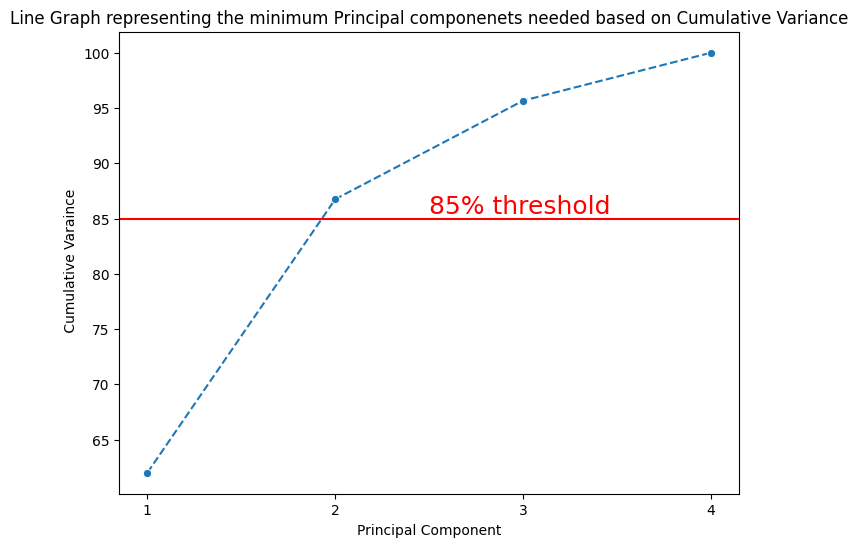

In [15]:
# Showing a graph to display the minimum number of components needed for the analysis
X = np.arange(1, 5, step=1)
plt.figure(figsize=(8,6))
sns.lineplot(x=X, y=np.cumsum(pca_scaled.explained_variance_ratio_)*100, linestyle='--', marker='o')

plt.title('Line Graph representing the minimum Principal componenets needed based on Cumulative Variance')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,5,step=1))
plt.ylabel(' Cumulative Varaince')
plt.axhline(y=85, color='r', linestyle='-')
plt.text(2.5, 85.5, '85% threshold', color = 'red', fontsize=18)
plt.show()

The graph shows that component 1 contains 62% of all the explained variances and component 2 contains 24.74% of all explained variances within the data. When adding up the percentages, we have an explained variance of 86.7a% within the data. This means 50% of the data has been cut off yet there is still 86.74% explanation value of feature deviation estimates that shows how all features affects each other.

### Therefore, the minimum principal component we need for the analysis is 2 because it goes over the threshold.

In [16]:
# Applying the minimum number of component gotten as 2
std_pca = PCA(n_components =2)
PC = std_pca.fit_transform(df_scaled)
PC.shape

(50, 2)

In [17]:
# Transforming the components into a pandas dataframe
PC_df = pd.DataFrame(data = PC, columns = ['Principal Component 1', 'Principal Component 2'])
PC_df['State'] = df['State']
PC_df.head()

,Principal Component 1,Principal Component 2,State
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


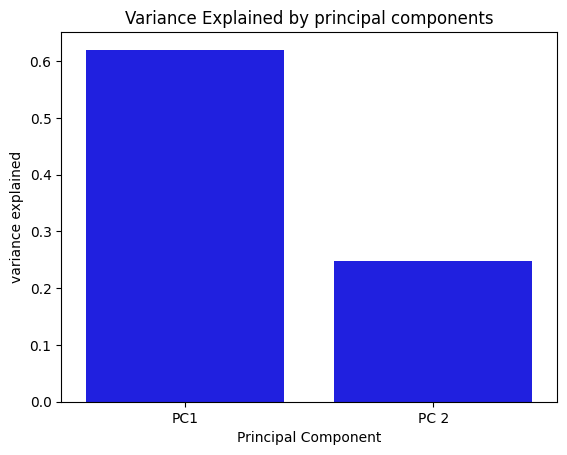

In [18]:
# Showing how each components affects the variance using a barplot
df_var = pd.DataFrame({'variance explained': std_pca.explained_variance_ratio_, 'Principal Component': ['PC1', 'PC 2']})
plt.title('Variance Explained by principal components')
sns.barplot(x='Principal Component', y='variance explained', data=df_var, color='b')
plt.show()

From the plot, PC1 affects the varaince very much compared to PC2 (More than double the variance of PC2. Therefore, alot of explanation variance are contained in PC2 has it contains alot of value.  

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


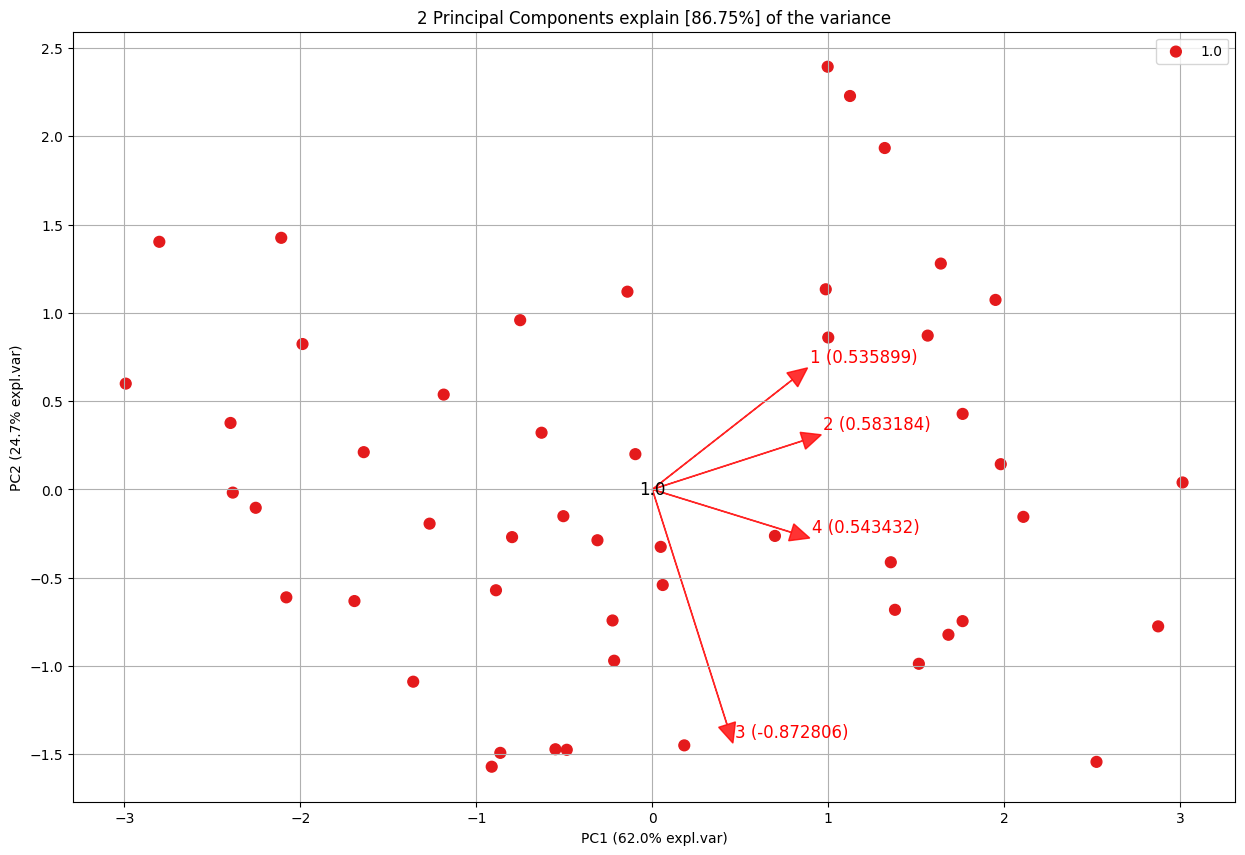

In [19]:
# Creating a biplot to represent components within the total dataframe
model = pca(n_components=2)
results = model.fit_transform(X_data)

# Making a biplot of the total number of features
fig, ax = model.biplot(n_feat=4, )

The graph above shows the two principal componenets generated observations. The points are the samples of the observation. The cities are displayed as points in the graph and the feature variables (Murder: 1, Assault: 2, UrbanPop: 3 and Rape: 4) are indicated as vectors. 
Each feature variables have positive correlation with the first Principal Component as can be seen in the biplot. 'UrbanPop' (denoted by 3) is the feature variable that has the highest correlation with the second principal component (negatively correlated with feature 4 - 'Rape') and it is also the only feature with a negative correlation (-0.872806).

## Cluster Analysis
From the Exploratory data analysis and the PCA performed above, the feature variables that shoild be dropped as a result of their negative correlation with either one or both Principal Components and with other feature variables are 'UrbanPop' and 'Rape'.  
### Henceforth, going forward the two feature variables that will be used for clustering analyses due their positive correlation among Principal Components and other feature variables are 'Murder' and 'Assualt'.

In [20]:
# Extracting the required values fro data
X_data = X_data[:,:2]
X_data[:5]

array([[1.25517927, 0.79078716],
       [0.51301858, 1.11805959],
       [0.07236067, 1.49381682],
       [0.23470832, 0.23321191],
       [0.28109336, 1.2756352 ]])

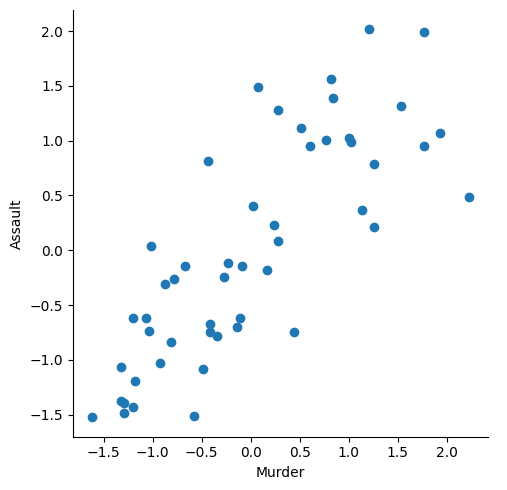

In [21]:
# A scatterplot showing the comparison between'Murder' vs 'Assault' rate

sns.FacetGrid(df_scaled,height=5).map(plt.scatter,"Murder","Assault").add_legend()

## We will start by applying Agglomerative clustering to the dataset.
### Comparing different parameters to see the clusters that they generate from the data: Using single, complete and average linkages, and Euclidean and Cityblock distance metrics respectively, print dendrograms for the different combinations.

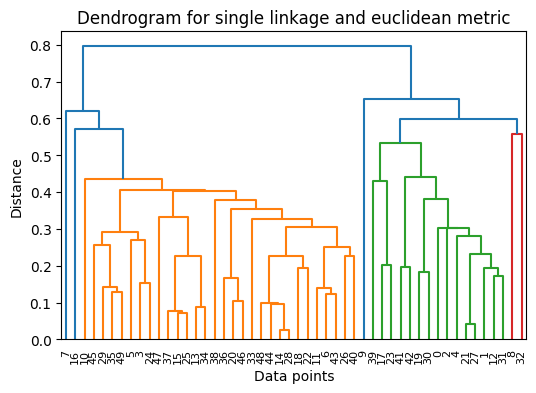

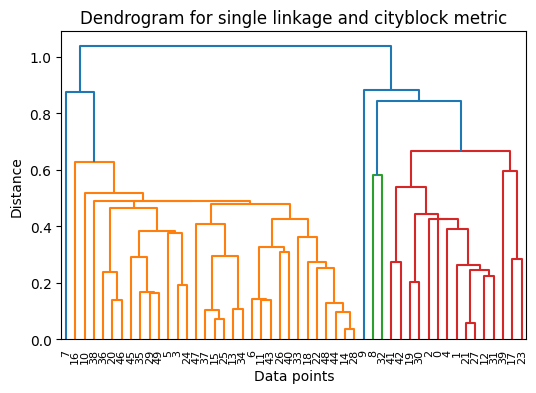

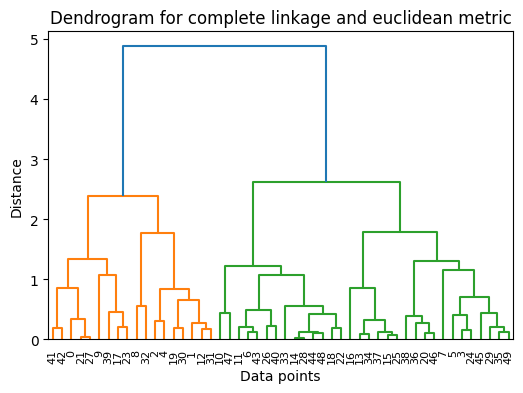

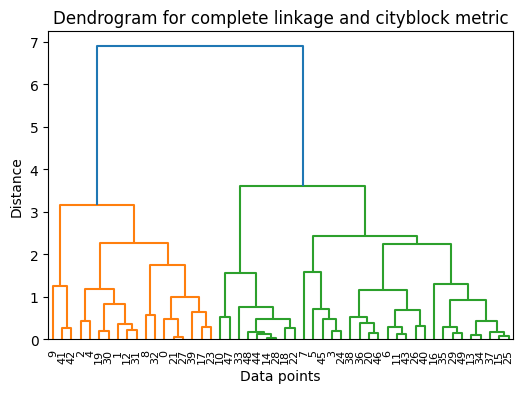

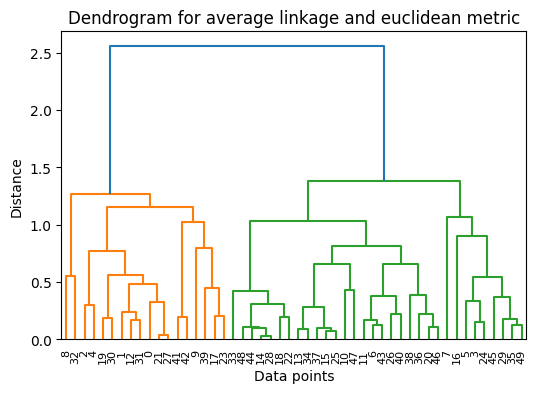

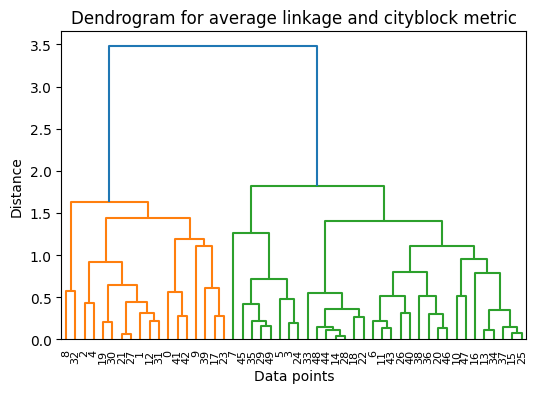

In [22]:
linkage_types = ['single','complete','average']
metric_types = ['euclidean','cityblock']
i = 0
for l in linkage_types:    
    for m in metric_types: 
        i=i+1        
        fig, axs = plt.subplots(1,1,figsize=(6,4))
        
        # Displaying a dendogram with the parameters
        dend = dendrogram(linkage(X_data, method=l, metric=m)) 
        #dend = sch.dendrogram(sch.linkage(data, method=l, metric=m))
        
        # Printing titles and labels
        plt.title('Dendrogram for {0} linkage and {1} metric'.format(l,m))
        plt.xlabel('Data points')
        plt.ylabel('Distance')

### From the plots, dendrogram for complete linkage and cityblock metric is the better plot because it showed that the clusters are very dissimilar due to the high distances between them represented by the y-axis. It follows that the blue lines represent our desired clusters. Because there are two (2) blue lines, it makes sense to say that there are 2 clusters.

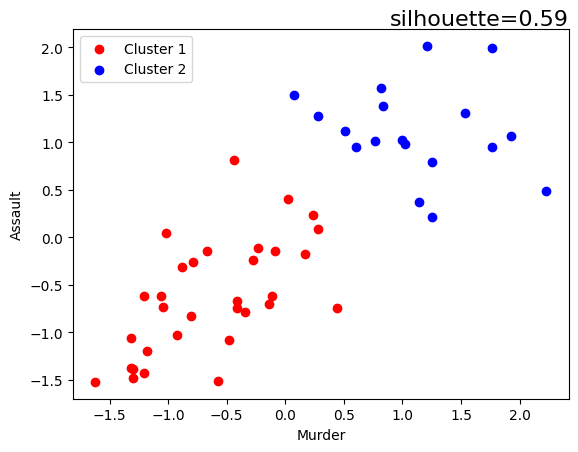

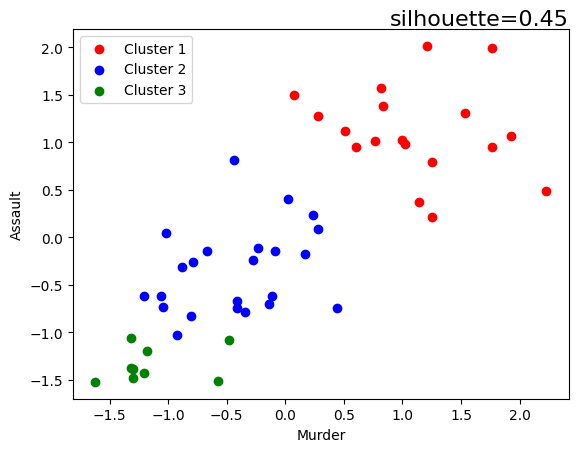

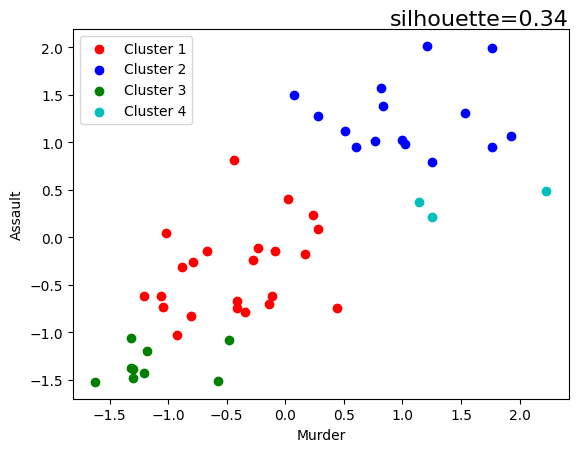

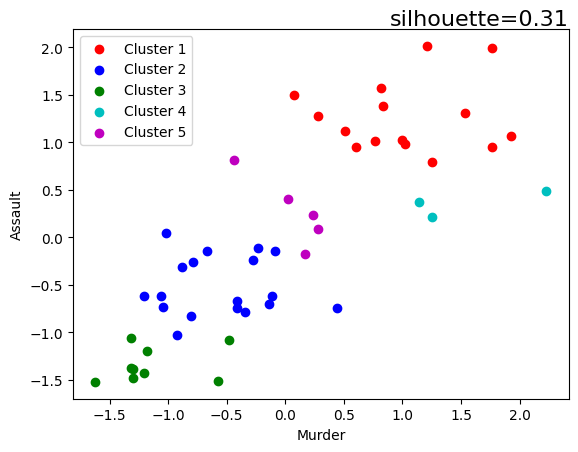

In [23]:
### Verifying the clusters obtained by using the Silhouette score
M = 'cityblock'
L = 'complete'

# Function to evaluate silhouette_score based on different number of clusters
def scatter_clf(x,k,m,l):
    clf = AgglomerativeClustering(n_clusters=k, metric=m, linkage=l)
    y_pred = clf.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
        plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c + 1))        
    
    score = round(silhouette_score(x,clf.labels_,metric=m),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.legend()
    plt.show()

# Calling the function while looping through the different numbers of clusters (2-5) 
for k in range(2,6):
    scatter_clf(X_data, k,M,L)

### Making agglomerative clustering predictions with the selected parameters from the dendrogram.

In [24]:
K = 2
M = 'cityblock'
L = 'complete'
AGC = AgglomerativeClustering(n_clusters=K, metric=M, linkage=L)
y_pred = AGC.fit_predict(X_data)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

Since the "reduced-features" PCA defined dataset is a representation of the initial dataset, it can be used to group the three crimes into clusters. From there we can now investigate the level of crime in their states where they occur.

In [25]:
# Let's attach the State column and the y_pred values to the scaled dataset (Copied)
crime = df_scaled.copy()
crime['State'] = df['State']
crime['cluster_labels'] = y_pred
# Let's see which State falls in which cluster
crime[['State','cluster_labels']]


,State,cluster_labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,1


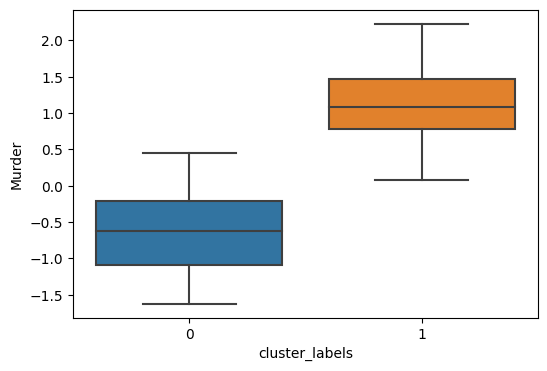

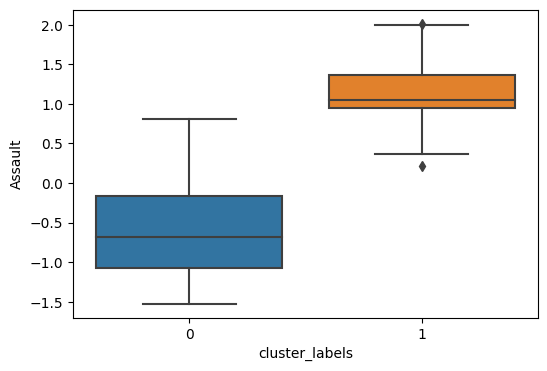

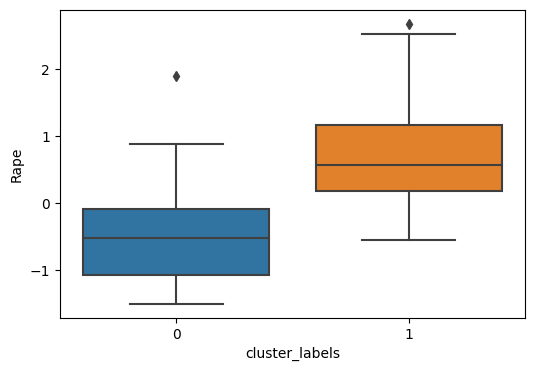

In [26]:
# PLot showing the clusters of Murder, Assault and Rape rates in the data
for label in labels:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster_labels', y=label, data=crime)

### From the boxplots above, we could see that cluster 1 has the highest crime rate while cluster 0 has the least.

In [27]:
# Confirming the clusters with the highest crime by averaging the three crimes
crime['AvgCrimeRate'] = round((crime.Murder + crime.Assault + crime.Rape)/3,2)
crime.head()

,Murder,Assault,UrbanPop,Rape,State,cluster_labels,AvgCrimeRate
0,1.255179,0.790787,-0.526195,-0.003451,Alabama,1,0.68
1,0.513019,1.118060,-1.224067,2.509424,Alaska,1,1.38
2,0.072361,1.493817,1.009122,1.053466,Arizona,1,0.87
3,0.234708,0.233212,-1.084492,-0.186794,Arkansas,0,0.09
4,0.281093,1.275635,1.776781,2.088814,California,1,1.22


<AxesSubplot: xlabel='cluster_labels', ylabel='AvgCrimeRate'>

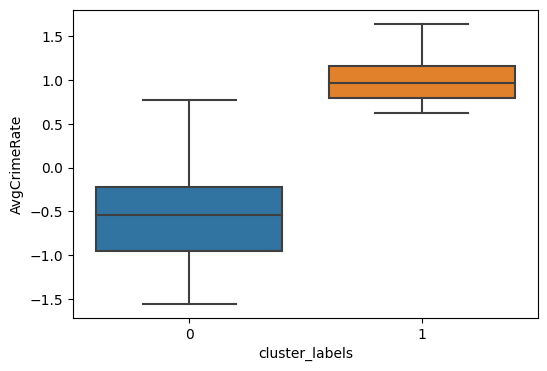

In [28]:
# Showing the average crime rate in a box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='cluster_labels', y='AvgCrimeRate', data=crime)

### From the plot above, it is confirmed that the clusters with the highest crime rates in decreasing order are; 1 and 0. We could also see from the size of the boxplots that more states are grouped in the low crime zone cluster while fewer states are in the high crime zone cluster.
Let's categorizing the zones as:
+ cluster 1: high crime zone
+ cluster 0: low crime zone

#### We can see the states in each zones by grouping.

In [29]:
# Showing low crime zone states
low_zone= crime.groupby('cluster_labels')['State'].unique()[0]
low_zone

array(['Arkansas', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii',
       'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine',
       'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska',
       'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

In [30]:
# Showing high crime zone states
high_zone= crime.groupby('cluster_labels')['State'].unique()[1]
high_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Florida', 'Georgia',
       'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi',
       'Nevada', 'New Mexico', 'New York', 'North Carolina',
       'South Carolina', 'Tennessee', 'Texas'], dtype=object)

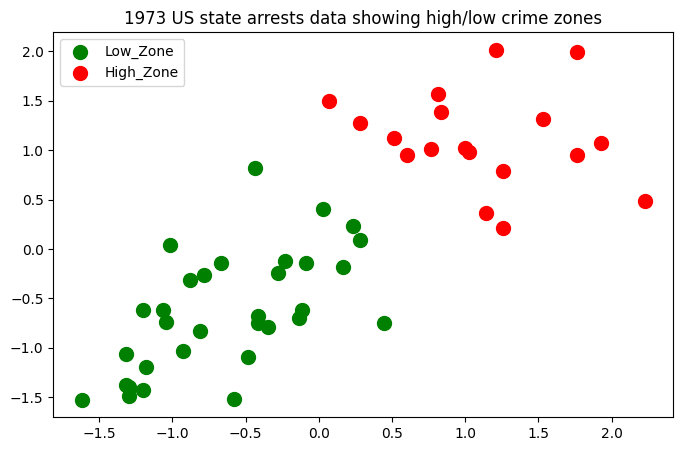

In [31]:
# Scatter plot showing the different zones of crime
plt.figure(figsize=(8,5))
plt.scatter(X_data[y_pred==0, 0], X_data[y_pred==0, 1], s=100, c='green', label ='Low_Zone')
plt.scatter(X_data[y_pred==1, 0], X_data[y_pred==1, 1], s=100, c='red', label ='High_Zone')
plt.title('1973 US state arrests data showing high/low crime zones')
plt.legend()
plt.show()

## Applying K-Means cluster analysis to the dataset

The Elbow method is commonly used strategy in which the algorithm is run multiple times with increasing values of k. This is then plotted against the sum of squared distances of samples to their closest cluster center (called inertia). The value of k to choose is identified from the resulting plot where there is an 'elbow' in the graph.

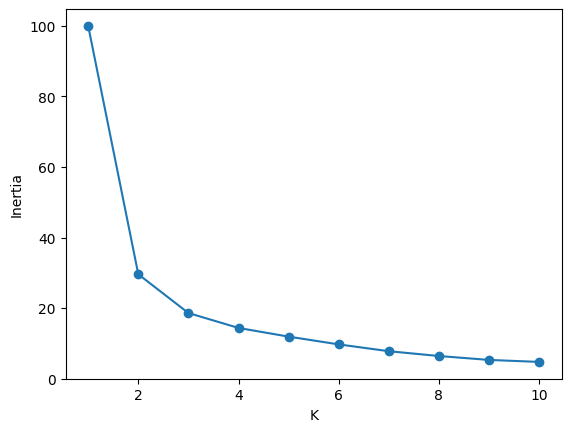

In [32]:
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=4):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X_data)


The elbow runs from k=2 to k=4. In cases like this, it is not always clear which value within the elbow is the most optimal, so we can investigate likely candidates further using the silhouette score. 

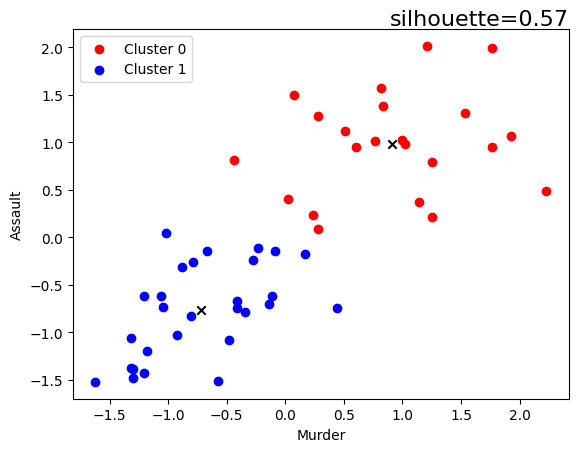

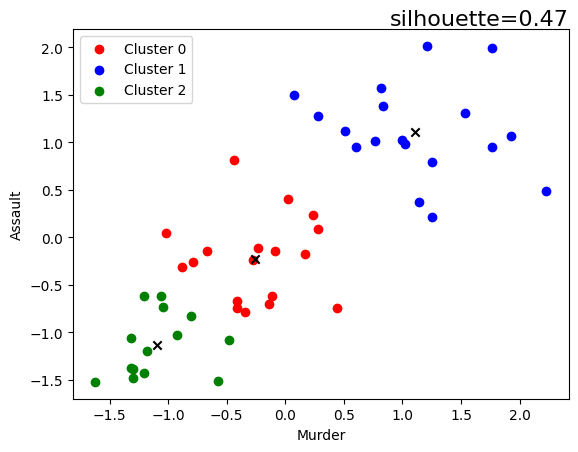

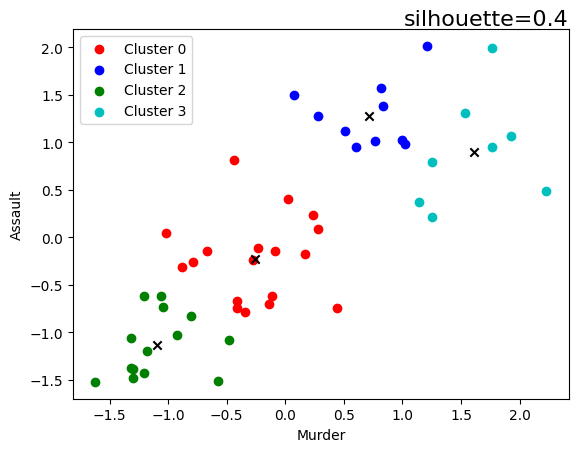

In [33]:
# Using the silhouette score to confirm the recommended cluster number
r=4
def scatter_Kmeans(x, k, r=4):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murder')
    plt.ylabel('Assault')
    plt.legend()
    plt.show()

for k in range(2,5):
  scatter_Kmeans(X_data, k, r)
  

From the results above, we can see that the best silhouette score is actually achieved using k=2.

### Making k-means clustering predictions with k=2.

In [34]:
k=2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
y_pred2 = kmeans.fit_predict(X_data)
y_pred2

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [35]:
# Let's attach the State column and the y_pred values to the scaled dataset (Copied)
kmeans_crime = df_scaled.copy()
kmeans_crime['State'] = df['State']
kmeans_crime['cluster_labels'] = y_pred2
# Let's see whickmeans_crimete falls in which cluster
kmeans_crime[['State','cluster_labels']].head()


,State,cluster_labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,0
4,California,0


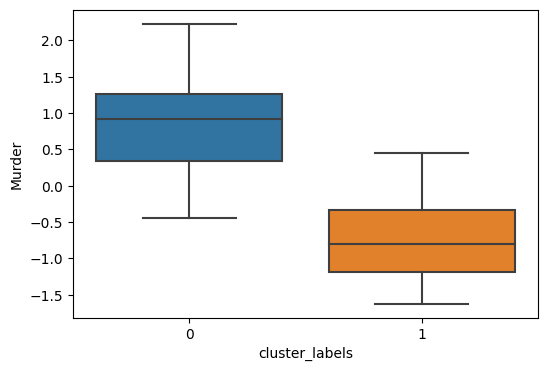

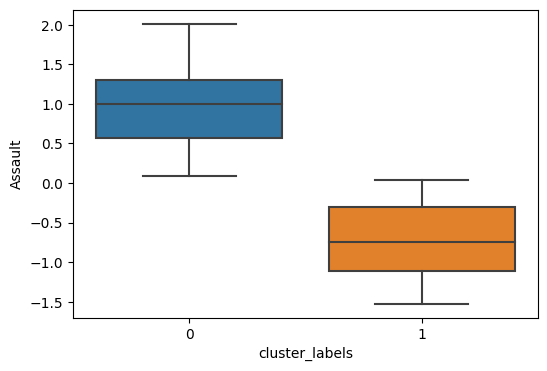

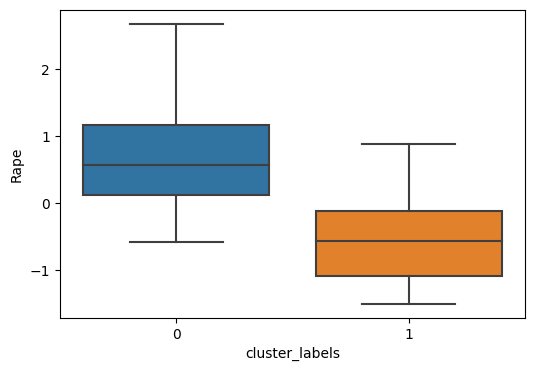

In [36]:
# PLot showing the clusters of Murder, Assault and Rape rates in the data
for label in labels:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster_labels', y=label, data=kmeans_crime)

### From the boxplots above, we could see that cluster 0 has the highest crime rate and cluster 1 is the least.

In [37]:
# Confirming the clusters with the highest crime by averaging the three crimes
kmeans_crime['AvgCrimeRate'] = round((kmeans_crime.Murder + crime.Assault + crime.Rape)/3,2)
kmeans_crime.head()

,Murder,Assault,UrbanPop,Rape,State,cluster_labels,AvgCrimeRate
0,1.255179,0.790787,-0.526195,-0.003451,Alabama,0,0.68
1,0.513019,1.118060,-1.224067,2.509424,Alaska,0,1.38
2,0.072361,1.493817,1.009122,1.053466,Arizona,0,0.87
3,0.234708,0.233212,-1.084492,-0.186794,Arkansas,0,0.09
4,0.281093,1.275635,1.776781,2.088814,California,0,1.22


<AxesSubplot: xlabel='cluster_labels', ylabel='AvgCrimeRate'>

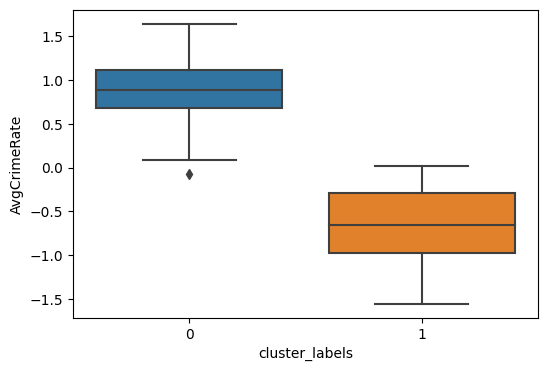

In [38]:
# Showing the average crime rate in a box plot
plt.figure(figsize=(6,4))
sns.boxplot(x='cluster_labels', y='AvgCrimeRate', data=kmeans_crime)

### From the plot above, it is confirmed that the clusters with the highest crime rates in decreasing order are; 0 and 1 for K-means clustering (similar to agglomerative clustering in cluster size but with a reverse numbering).
Let's categorizing the zones as:
+ cluster 0: high crime zone
+ cluster 1: low crime zone

### Also, just like in the agglomerative clustering, there are more states in the low crime zone cluster than in the high crime zone cluster.

#### We can see the states in each zones by grouping.

In [39]:
# Showing high crime zone states
high_zone= kmeans_crime.groupby('cluster_labels')['State'].unique()[0]
high_zone

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Delaware', 'Florida', 'Georgia', 'Illinois',
       'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Missouri',
       'Nevada', 'New Mexico', 'New York', 'North Carolina',
       'South Carolina', 'Tennessee', 'Texas'], dtype=object)

In [40]:
# Showing low crime zone states
low_zone= kmeans_crime.groupby('cluster_labels')['State'].unique()[1]
low_zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Montana',
       'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

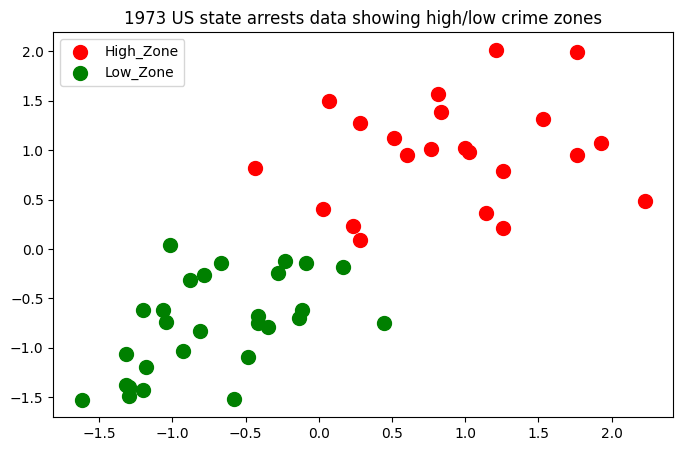

In [41]:
# Scatter plot showing the different zones of crime using Kmeans clustering
plt.figure(figsize=(8,5))
plt.scatter(X_data[y_pred2==0, 0], X_data[y_pred2==0, 1], s=100, c='red', label ='High_Zone')
plt.scatter(X_data[y_pred2==1, 0], X_data[y_pred2==1, 1], s=100, c='green', label ='Low_Zone')
plt.title('1973 US state arrests data showing high/low crime zones')
plt.legend()
plt.show()

## Comparing the two clustering models: Agglomerative and K-means

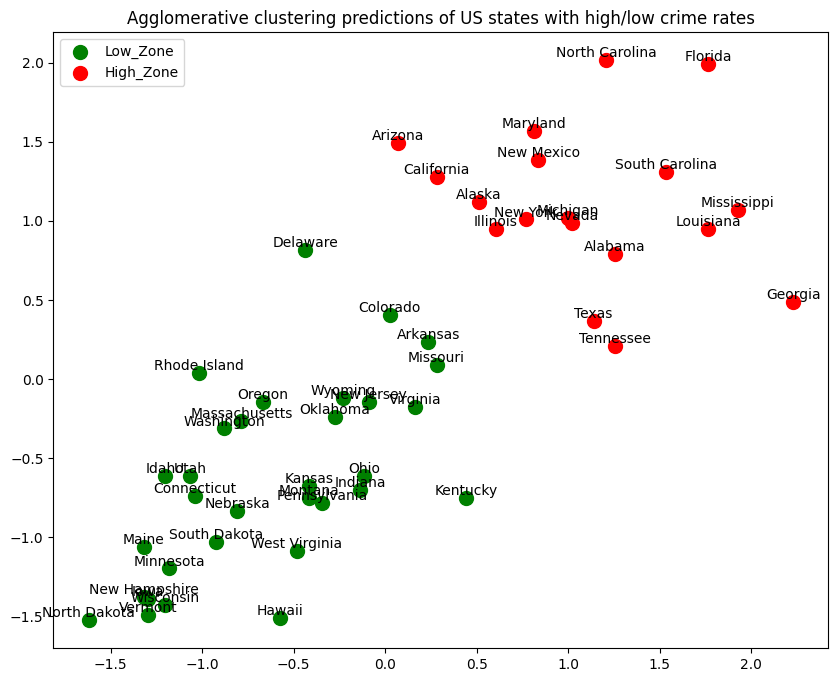

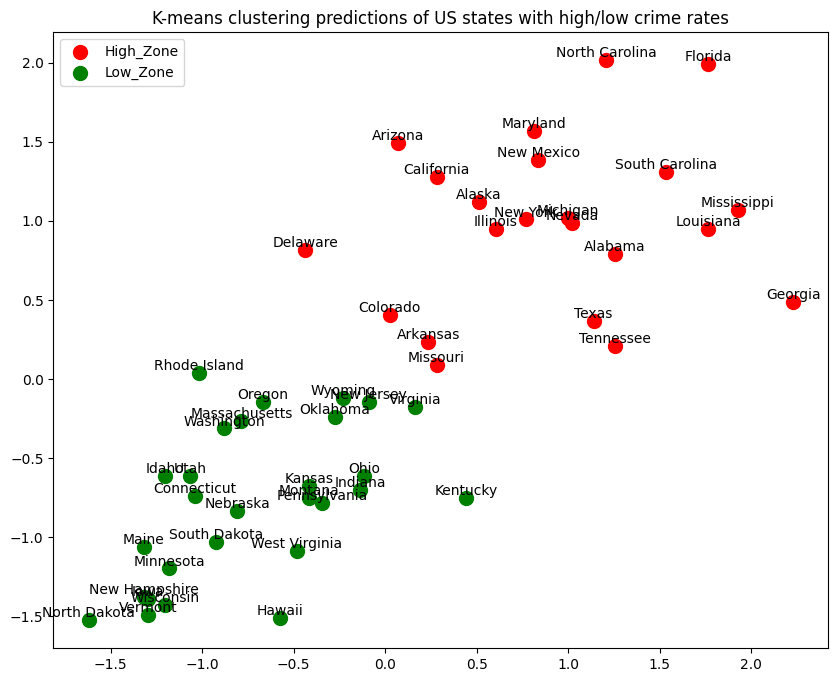

1


In [44]:
predictions = [y_pred, y_pred2]

# Initialize the zones
label1 = 'Low_Zone'
label2 = 'High_Zone'

# Initialize the colours
colour1 = 'green'
colour2 = 'red'

# First model applied
model = 'Agglomerative clustering'

# Looping through the predictions for both models
for i, pred in enumerate(predictions):
    plt.figure(figsize=(10,8)) 
    if i == 1:
        label1 = 'High_Zone'
        label2 = 'Low_Zone'
        colour1 = 'red'
        colour2 = 'green'  
        model = 'K-means clustering'
    plt.scatter(X_data[pred==0, 0], X_data[pred==0, 1], s=100, c = colour1, label = label1)
    plt.scatter(X_data[pred==1, 0], X_data[pred==1, 1], s=100, c = colour2, label = label2)
    plt.title(f'{model} predictions of US states with high/low crime rates')
    plt.legend()
    
    # Looping through the points and lebelling the state names
    for (xi, yi, zi) in zip(crime['Murder'], crime['Assault'], crime['State']):
        plt.text(xi, yi, zi, va='bottom', ha='center')
    plt.show()


### From the two plots above, we could see that the two models predicted similar group of states between the low and high crime cluster zones. The only difference however are the two boundary states between the clusters in each model where the four states, Dalaware, Colorado, Arkansas and Missouri were predicted as low crime zone states in Agglomerative clustering while they were predicted as high crime zone states in K-means clustering.

# Thank you for going through the Analysis

Github link: